# Sentinel 1 and World Cover

### Important Libraries

In [ ]:
import ee
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime
from datetime import timedelta
!pip install geemap
ee.Authenticate()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 53.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 47.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 53.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 48.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 82.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 92.4 MB/s eta 0:00:00
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11124 sha256=dd1203fe6412dc1642814f93a454446cb16f3c4861f9b1ff4228e7ae153cc48f
  Store

In [ ]:
ee.Initialize()
import geemap
from geemap.plot import center_zoom_to_xy_range
import ipywidgets as widgets
from ipyleaflet import WidgetControl
from geemap import geojson_to_ee

### Region of Interest

In [ ]:
import geemap
from geemap.plot import center_zoom_to_xy_range
import ipywidgets as widgets
from ipyleaflet import WidgetControl
from geemap import geojson_to_ee

Map1 = geemap.Map(center =[23.8402, 87.6186], zoom_start=50)

dc = Map1.draw_control

roi = []
# Handle draw events
def handle_draw(self, action, geo_json):
    geometry = geo_json['geometry']
    if geometry['type'] == 'Polygon':
        coordinates = geometry['coordinates'][0]
        roi.append(coordinates)
        print("Polygon coordinates:", coordinates)
dc.on_draw(handle_draw)
Map1

Map(center=[23.8402, 87.6186], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(chi…

Polygon coordinates: [[88.280484, 26.980829], [85.952222, 22.451649], [87.467789, 21.861499], [89.42265, 21.861499], [89.774086, 26.68673], [88.390307, 27.352253], [88.280484, 26.980829]]


### Rice Group Selection By hand on Map

In [ ]:
polygon = ee.Geometry.Polygon(roi)

Map = geemap.Map(center =[23.8402, 87.6186], zoom_start=9)


sentinel1 = ee.ImageCollection('COPERNICUS/S1_GRD').filterDate('2022-06-01', '2022-06-15').filter(ee.Filter.listContains('transmitterReceiverPolarisation', 'VH')).filter(ee.Filter.eq('instrumentMode', 'IW')).filter(ee.Filter.Or(ee.Filter.eq('orbitProperties_pass', 'ASCENDING'), ee.Filter.eq('orbitProperties_pass', 'DESCENDING'))).filterBounds(polygon)
sentinel2 = ee.ImageCollection('COPERNICUS/S1_GRD').filterDate('2022-06-16', '2022-06-30').filter(ee.Filter.listContains('transmitterReceiverPolarisation', 'VH')).filter(ee.Filter.eq('instrumentMode', 'IW')).filter(ee.Filter.Or(ee.Filter.eq('orbitProperties_pass', 'ASCENDING'), ee.Filter.eq('orbitProperties_pass', 'DESCENDING'))).filterBounds(polygon)
sentinel3 = ee.ImageCollection('COPERNICUS/S1_GRD').filterDate('2022-07-01', '2022-07-15').filter(ee.Filter.listContains('transmitterReceiverPolarisation', 'VH')).filter(ee.Filter.eq('instrumentMode', 'IW')).filter(ee.Filter.Or(ee.Filter.eq('orbitProperties_pass', 'ASCENDING'), ee.Filter.eq('orbitProperties_pass', 'DESCENDING'))).filterBounds(polygon)
sentinel4 = ee.ImageCollection('COPERNICUS/S1_GRD').filterDate('2022-07-16', '2022-07-31').filter(ee.Filter.listContains('transmitterReceiverPolarisation', 'VH')).filter(ee.Filter.eq('instrumentMode', 'IW')).filter(ee.Filter.Or(ee.Filter.eq('orbitProperties_pass', 'ASCENDING'), ee.Filter.eq('orbitProperties_pass', 'DESCENDING'))).filterBounds(polygon)
sentinel5 = ee.ImageCollection('COPERNICUS/S1_GRD').filterDate('2022-08-01', '2022-08-15').filter(ee.Filter.listContains('transmitterReceiverPolarisation', 'VH')).filter(ee.Filter.eq('instrumentMode', 'IW')).filter(ee.Filter.Or(ee.Filter.eq('orbitProperties_pass', 'ASCENDING'), ee.Filter.eq('orbitProperties_pass', 'DESCENDING'))).filterBounds(polygon)
sentinel6 = ee.ImageCollection('COPERNICUS/S1_GRD').filterDate('2022-08-16', '2022-08-31').filter(ee.Filter.listContains('transmitterReceiverPolarisation', 'VH')).filter(ee.Filter.eq('instrumentMode', 'IW')).filter(ee.Filter.Or(ee.Filter.eq('orbitProperties_pass', 'ASCENDING'), ee.Filter.eq('orbitProperties_pass', 'DESCENDING'))).filterBounds(polygon)
sentinel7 = ee.ImageCollection('COPERNICUS/S1_GRD').filterDate('2022-09-01', '2022-09-15').filter(ee.Filter.listContains('transmitterReceiverPolarisation', 'VH')).filter(ee.Filter.eq('instrumentMode', 'IW')).filter(ee.Filter.Or(ee.Filter.eq('orbitProperties_pass', 'ASCENDING'), ee.Filter.eq('orbitProperties_pass', 'DESCENDING'))).filterBounds(polygon)
sentinel8 = ee.ImageCollection('COPERNICUS/S1_GRD').filterDate('2022-09-16', '2022-09-30').filter(ee.Filter.listContains('transmitterReceiverPolarisation', 'VH')).filter(ee.Filter.eq('instrumentMode', 'IW')).filter(ee.Filter.Or(ee.Filter.eq('orbitProperties_pass', 'ASCENDING'), ee.Filter.eq('orbitProperties_pass', 'DESCENDING'))).filterBounds(polygon)
sentinel9 = ee.ImageCollection('COPERNICUS/S1_GRD').filterDate('2022-10-01', '2022-10-15').filter(ee.Filter.listContains('transmitterReceiverPolarisation', 'VH')).filter(ee.Filter.eq('instrumentMode', 'IW')).filter(ee.Filter.Or(ee.Filter.eq('orbitProperties_pass', 'ASCENDING'), ee.Filter.eq('orbitProperties_pass', 'DESCENDING'))).filterBounds(polygon)
sentinel10 = ee.ImageCollection('COPERNICUS/S1_GRD').filterDate('2022-10-16', '2022-10-31').filter(ee.Filter.listContains('transmitterReceiverPolarisation', 'VH')).filter(ee.Filter.eq('instrumentMode', 'IW')).filter(ee.Filter.Or(ee.Filter.eq('orbitProperties_pass', 'ASCENDING'), ee.Filter.eq('orbitProperties_pass', 'DESCENDING'))).filterBounds(polygon)


image1 = sentinel1.select('VH').mean().rename('VH1')
image2 = sentinel2.select('VH').mean().rename('VH2')
image3 = sentinel3.select('VH').mean().rename('VH3')
image4 = sentinel4.select('VH').mean().rename('VH4')
image5 = sentinel5.select('VH').mean().rename('VH5')
image6 = sentinel6.select('VH').mean().rename('VH6')
image7 = sentinel7.select('VH').mean().rename('VH7')
image8 = sentinel8.select('VH').mean().rename('VH8')
image9 = sentinel9.select('VH').mean().rename('VH9')
image10 = sentinel10.select('VH').mean().rename('VH10')

stacked = image1.addBands([image2,image3,image4,image5,image6,image7,image8,image9,image10]).clip(polygon)

stacked_scaled = stacked.multiply(10).add(350).uint8();
bands = ['VH7','VH8','VH9']
display = {'bands': bands,'min': 0, 'max': 220}





# Load the WorldCover dataset
dataset = ee.ImageCollection("ESA/WorldCover/v100").first().clip(polygon)
# Update the dataset to only include agricultural land (class 40)
dataset_agri = dataset.updateMask(dataset.eq(40))
# Visualization parameters
visualization = {
  'bands': 'Map'
}
# Center the map on the dataset
Map.centerObject(dataset)




# Add the landcover layer to the map
Map.addLayer(dataset, visualization, "Landcover")

# Add the stacked layer to the map
Map.addLayer(stacked_scaled, display, 'stacked')

# Get the DrawControl
dc = Map.draw_control

# List of recognised Fields
polygon_coordinates = []

# Handle draw events
def handle_draw(self, action, geo_json):
    geometry = geo_json['geometry']
    if geometry['type'] == 'Polygon':
        coordinates = geometry['coordinates'][0]
        polygon_coordinates.append(coordinates)
        print("Polygon coordinates:", coordinates)

dc.on_draw(handle_draw)


Map
# print(image1)

Map(center=[23.8402, 87.6186], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(chi…

Polygon coordinates: [[88.157623, 22.013087], [88.119862, 21.97425], [88.166548, 21.978071], [88.157623, 22.013087]]
Polygon coordinates: [[88.52661, 24.367426], [88.517513, 24.3582], [88.531072, 24.355073], [88.52661, 24.367426]]
Polygon coordinates: [[86.018645, 23.040877], [86.010922, 23.01876], [86.032548, 23.029503], [86.018645, 23.040877]]
Polygon coordinates: [[86.743054, 22.984313], [86.74786, 22.966138], [86.76571, 22.976886], [86.743054, 22.984313]]
Polygon coordinates: [[87.949316, 22.299103], [87.937473, 22.282743], [87.954465, 22.282743], [87.949316, 22.299103]]


In [ ]:
polygon_coordinates

[[[88.157623, 22.013087],
  [88.119862, 21.97425],
  [88.166548, 21.978071],
  [88.157623, 22.013087]],
 [[88.52661, 24.367426],
  [88.517513, 24.3582],
  [88.531072, 24.355073],
  [88.52661, 24.367426]],
 [[86.018645, 23.040877],
  [86.010922, 23.01876],
  [86.032548, 23.029503],
  [86.018645, 23.040877]],
 [[86.743054, 22.984313],
  [86.74786, 22.966138],
  [86.76571, 22.976886],
  [86.743054, 22.984313]],
 [[87.949316, 22.299103],
  [87.937473, 22.282743],
  [87.954465, 22.282743],
  [87.949316, 22.299103]]]

### For Generating Dataset

In [ ]:
# function to get the rice fields of requirement
def generate_fields (polygon_coordinates):
  fields = []
  for field in polygon_coordinates :
    field = np.array(field)
    field = np.transpose(field)
    for i in range(10):
      coeff = np.random.rand(field.shape[1])
      coeff /= coeff.sum()
      fieldpoint = np.dot(field, coeff)
      fields.append(list(fieldpoint))
  return fields

In [ ]:
# Getting the rice fields
fields = generate_fields(polygon_coordinates) #Here the polygon_coordinates contains the primary rice fields
fields

[[88.14929901695433, 21.999820717686642],
 [88.14878089004156, 22.001664574307046],
 [88.1379142757752, 21.985370193217243],
 [88.15355821134824, 22.001968710532836],
 [88.15497512800562, 21.994677637316258],
 [88.15966185857164, 22.00466679425826],
 [88.15505989111284, 21.99641094895167],
 [88.13989318605311, 21.993776778277226],
 [88.14923905236577, 21.984664897798417],
 [88.14833603059483, 21.998677726693675],
 [88.52601207542216, 24.359200590564637],
 [88.52325838969416, 24.36160573466132],
 [88.52651745819094, 24.364783803414667],
 [88.52351733362516, 24.363259868693113],
 [88.52433619289164, 24.363879573507013],
 [88.52641843838441, 24.36235332429564],
 [88.52713327191111, 24.36112162441946],
 [88.52576195188234, 24.362386808277574],
 [88.52661948615925, 24.360327992495023],
 [88.52787984853384, 24.36362638417426],
 [86.02117336778245, 23.03054372083485],
 [86.02113646989844, 23.030362937122508],
 [86.02258730220447, 23.032513412200124],
 [86.02369743928978, 23.033822622941905],


In [ ]:
# Making the dataframe which will contain our training dataset
df = pd.DataFrame(np.array(fields)).rename({0 : 'latitude', 1 : 'longitude'}, axis = 1)
df.shape


(50, 2)

In [ ]:
# Adding Rice-Groups Class
df['Rice-Groups']=None

In [ ]:
for i in range(1,11):
  ls = []
  for j in range(df.shape[0]):
    pointOfInterest = ee.Geometry.Point([df.iloc[j][0],df.iloc[j][1]])
    bandValues = stacked_scaled.reduceRegion(
      reducer = ee.Reducer.first(),  # You can choose a different reducer if needed
      geometry = pointOfInterest,
      scale = 30,  # Specify the scale/resolution for the analysis
      maxPixels = 30  # Set a limit for the number of pixels to be processed
    )
    ls.append(ee.Number(bandValues.get('VH'+str(i))).toInt().getInfo())
  df['VH'+str(i)] = pd.Series(np.array(ls))
  df['Rice-Groups']='Waterbody'


In [ ]:
df

,latitude,longitude,Rice-Groups,VH1,VH2,VH3,VH4,VH5,VH6,VH7,VH8,VH9,VH10
0,88.149299,21.999821,Waterbody,81,88,87,90,80,87,87,67,105,98
1,88.148781,22.001665,Waterbody,82,88,78,78,71,75,76,105,76,117
2,88.137914,21.985370,Waterbody,85,75,75,82,82,66,64,61,81,99
3,88.153558,22.001969,Waterbody,87,82,100,107,82,92,69,76,80,101
4,88.154975,21.994678,Waterbody,78,90,101,64,89,83,87,81,80,131
5,88.159662,22.004667,Waterbody,90,94,77,82,85,91,91,80,88,106
6,88.155060,21.996411,Waterbody,62,79,86,74,82,87,74,90,82,127
7,88.139893,21.993777,Waterbody,77,81,78,73,83,79,83,74,88,110
8,88.149239,21.984665,Waterbody,73,75,85,64,87,76,93,106,99,102
9,88.148336,21.998678,Waterbody,85,76,94,86,69,87,78,66,85,101


In [ ]:
# Concatenate the DataFrames vertically
df_final = pd.concat([df_final,df])

# # Reset the index of the concatenated DataFrame
df_final.reset_index(drop=True, inplace=True)

In [ ]:
df_final

,latitude,longitude,Rice-Groups,VH1,VH2,VH3,VH4,VH5,VH6,VH7,VH8,VH9,VH10
0,87.769473,24.303725,Class1,153,131,84,129,134,162,180,188,214,201
1,87.769445,24.303673,Class1,153,131,84,129,134,162,180,188,214,201
2,87.769436,24.303653,Class1,153,131,84,129,134,162,180,188,214,201
3,87.769434,24.303657,Class1,153,131,84,129,134,162,180,188,214,201
4,87.769395,24.303627,Class1,153,131,84,129,134,162,180,188,214,201
...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,87.945901,22.291329,Waterbody,86,95,83,83,91,81,79,80,77,100
406,87.950078,22.290233,Waterbody,89,102,85,91,69,84,88,78,85,98
407,87.942947,22.286766,Waterbody,81,85,92,100,84,79,96,90,84,85
408,87.946519,22.291748,Waterbody,75,76,78,89,74,91,85,91,86,102


In [ ]:
df_final

,latitude,longitude,Rice-Groups,VH1,VH2,VH3,VH4,VH5,VH6,VH7,VH8,VH9,VH10
0,87.769473,24.303725,Class1,153,131,84,129,134,162,180,188,214,201
1,87.769445,24.303673,Class1,153,131,84,129,134,162,180,188,214,201
2,87.769436,24.303653,Class1,153,131,84,129,134,162,180,188,214,201
3,87.769434,24.303657,Class1,153,131,84,129,134,162,180,188,214,201
4,87.769395,24.303627,Class1,153,131,84,129,134,162,180,188,214,201
...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,88.186288,22.047016,Waterbody,96,86,102,87,87,96,93,90,100,119
406,88.176979,22.020856,Waterbody,80,83,92,89,80,86,101,82,106,111
407,88.174962,22.023656,Waterbody,79,100,85,84,77,80,140,80,88,112
408,88.179716,22.031887,Waterbody,86,78,81,83,84,95,96,83,77,102


In [ ]:
ds = df_final['Rice-Groups'].value_counts()
ds

Class2       50
Class4       50
City         50
Grassland    50
Waterbody    50
Class1       40
Class3       40
Class5       40
Forest       40
Name: Rice-Groups, dtype: int64

In [ ]:
df1 = df_final

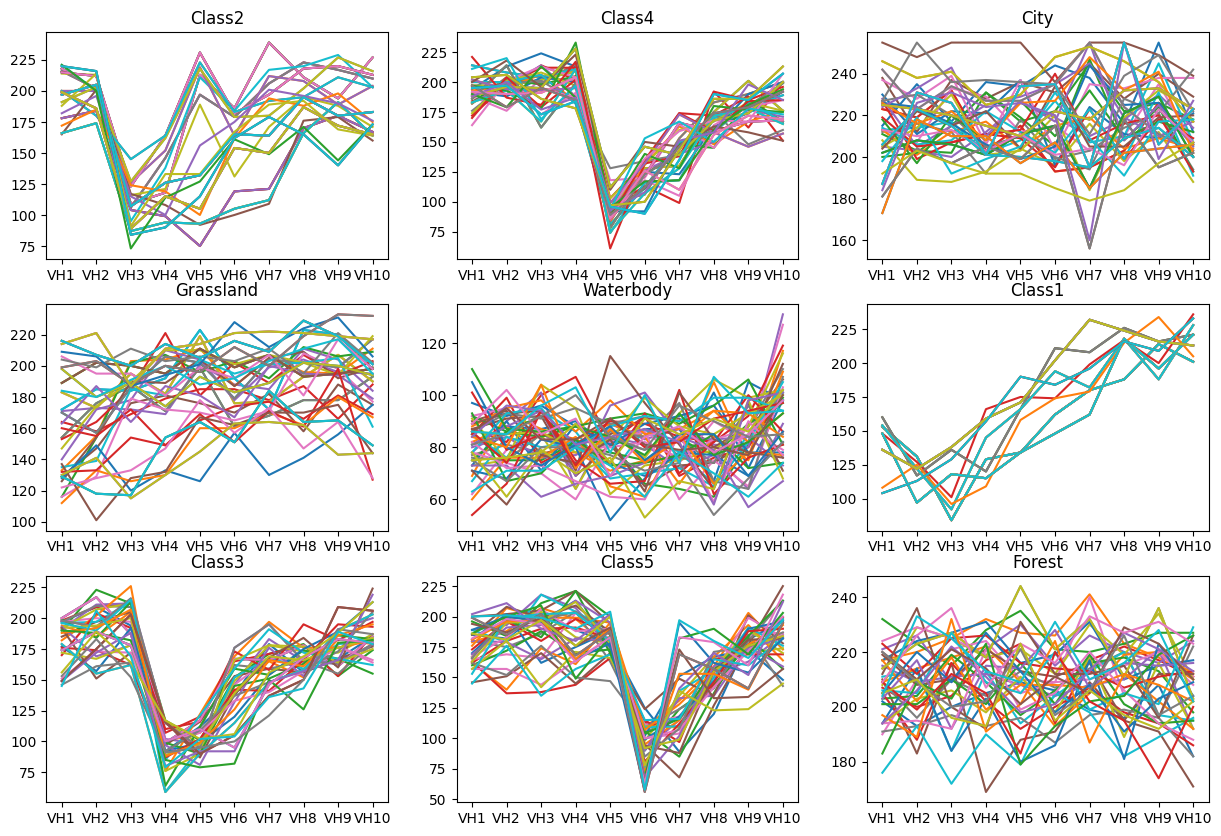

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(15,10)
figure, ax = plt.subplots(3,3)
k =0
for j in list(ds.index):
  for i in range(int(df1[df1["Rice-Groups"] == j ].shape[0])):
    ax[int(k/3)][k%3].plot((df1[df1["Rice-Groups"] == j].iloc[i])[3:])
  ax[int(k/3)][k%3].title.set_text(str(j))
  k = k+1

In [ ]:
df1.to_csv('newdata.csv')

### Clustering

In [ ]:
df = pd.read_csv('newdata.csv',)

In [ ]:
df.drop('Unnamed: 0', inplace=True, axis=1)

In [ ]:
df.head()

,latitude,longitude,Rice-Groups,VH1,VH2,VH3,VH4,VH5,VH6,VH7,VH8,VH9,VH10
0,87.769473,24.303725,Class1,153,131,84,129,134,162,180,188,214,201
1,87.769445,24.303673,Class1,153,131,84,129,134,162,180,188,214,201
2,87.769436,24.303653,Class1,153,131,84,129,134,162,180,188,214,201
3,87.769434,24.303657,Class1,153,131,84,129,134,162,180,188,214,201
4,87.769395,24.303627,Class1,153,131,84,129,134,162,180,188,214,201


In [ ]:
df['Rice-Groups'].value_counts()

Class2       50
Class4       50
City         50
Grassland    50
Waterbody    50
Class1       40
Class3       40
Class5       40
Forest       40
Name: Rice-Groups, dtype: int64

In [ ]:
from sklearn.cluster import *
from sklearn.preprocessing import StandardScaler

In [ ]:
X = df.loc[:,'VH1':]

In [ ]:
clf1 = KMeans(n_clusters = 9)
clf2 = AgglomerativeClustering(n_clusters = 9)
clf3 = DBSCAN(eps = 0.4, min_samples = 5)

In [ ]:
clf1.fit(X)
clf2.fit(X)
clf3.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


DBSCAN(eps=0.4)

In [ ]:
df["y_pred_means"] = clf1.fit_predict(X)
df["y_pred_hierarchial"] = clf2.fit_predict(X)
df["y_pred_density"] = clf3.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
ls = []
for i in list(df["Rice-Groups"].unique()):
  dict = {"means":[],"hierarchial":[],"density":[]}
  dict["means"] = list(df[df["Rice-Groups"] == i]["y_pred_means"].unique())
  dict["hierarchial"] = list(df[df["Rice-Groups"] == i]["y_pred_hierarchial"].unique())
  dict["density"] = list(df[df["Rice-Groups"] == i]["y_pred_density"].unique())
  dict = {i:dict}
  ls.append(dict)

In [ ]:
ls

[{'Class1': {'means': [3], 'hierarchial': [0], 'density': [0, 1, -1, 2, 3]}},
 {'Class2': {'means': [4, 5],
   'hierarchial': [8, 1],
   'density': [4, -1, 5, 6, 7]}},
 {'Class3': {'means': [6], 'hierarchial': [3], 'density': [-1]}},
 {'Class4': {'means': [1], 'hierarchial': [6], 'density': [-1, 8]}},
 {'Class5': {'means': [8], 'hierarchial': [2], 'density': [-1]}},
 {'Forest': {'means': [7, 2], 'hierarchial': [4, 5], 'density': [-1]}},
 {'City': {'means': [2, 7], 'hierarchial': [5, 4], 'density': [-1]}},
 {'Grassland': {'means': [7, 3, 2, 5],
   'hierarchial': [4, 5, 0],
   'density': [-1]}},
 {'Waterbody': {'means': [0], 'hierarchial': [7], 'density': [-1]}}]

### Training Algorithm

In [ ]:
# Machine Learning Model : Random Forest Classifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
X = df.drop('Rice-Groups',axis=1)
y = df['Rice-Groups']
X_train, X_test, y_train, y_test=train_test_split(X, y, train_size=0.8, random_state=69, stratify=y)

In [ ]:
rnd_clf = RandomForestClassifier(n_estimators=200, max_leaf_nodes=128, min_impurity_decrease = 0.1, criterion = 'gini')
rnd_clf.fit(X_train, y_train)
y_pred = rnd_clf.predict(X_test)

In [ ]:
# Predicted Data Value Counts
pd.Series(y_pred).value_counts()

City         20
Class4       10
Class2       10
Waterbody    10
Forest        8
Class3        8
Class5        8
Class1        8
dtype: int64

In [ ]:
y_test.value_counts()

Class4       10
Class2       10
Waterbody    10
Grassland    10
City         10
Forest        8
Class3        8
Class5        8
Class1        8
Name: Rice-Groups, dtype: int64

In [ ]:
# Accuracy Of The Model
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix, roc_auc_score, roc_curve, classification_report

accuracy_score(y_test, y_pred)

0.9878048780487805

In [ ]:
f1_score(y_test,y_pred, average=None)

array([0.66666667, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 0.        , 1.        ])

In [ ]:
a = y_test
b = pd.get_dummies(a)
b = b.values.argmax(1)

In [ ]:
b

array([4, 4, 5, 4, 3, 1, 2, 8, 0, 6, 2, 8, 5, 1, 2, 0, 2, 1, 8, 1, 4, 2,
       7, 1, 5, 7, 3, 4, 1, 7, 3, 8, 2, 6, 8, 5, 4, 8, 4, 1, 5, 1, 0, 1,
       6, 4, 3, 6, 2, 3, 3, 0, 8, 5, 0, 2, 4, 0, 0, 3, 1, 1, 1, 2, 1, 5,
       8, 4, 2, 6, 3, 0, 6, 5, 6, 4, 8, 1, 0, 1, 6, 5])

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
c = le.fit_transform(y_test)

In [ ]:
c

array([4, 4, 5, 4, 3, 1, 2, 8, 0, 6, 2, 8, 5, 1, 2, 0, 2, 1, 8, 1, 4, 2,
       7, 1, 5, 7, 3, 4, 1, 7, 3, 8, 2, 6, 8, 5, 4, 8, 4, 1, 5, 1, 0, 1,
       6, 4, 3, 6, 2, 3, 3, 0, 8, 5, 0, 2, 4, 0, 0, 3, 1, 1, 1, 2, 1, 5,
       8, 4, 2, 6, 3, 0, 6, 5, 6, 4, 8, 1, 0, 1, 6, 5])

In [ ]:
fpr, tpr, thresholds = roc_curve(c, b)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

ValueError: ignored

### Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameters = {
    'criterion':('gini','log_loss','entropy'),
    'n_estimators':[200,300,400,500],
    'max_leaf_nodes':[64,128,256,512],
    'min_impurity_decrease':[0.1,0.2,0.3,0.01],
}

In [ ]:
clf_gCV = GridSearchCV(rnd_clf,param_grid=parameters)

In [ ]:
clf_gCV.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(max_leaf_nodes=128,
                                              min_impurity_decrease=0.1,
                                              n_estimators=200),
             param_grid={'criterion': ('gini', 'log_loss', 'entropy'),
                         'max_leaf_nodes': [64, 128, 256, 512],
                         'min_impurity_decrease': [0.1, 0.2, 0.3, 0.01],
                         'n_estimators': [200, 300, 400, 500]})

In [ ]:
## Prediction
y_pred=clf_gCV.predict(X_test)
print(confusion_matrix(y_pred,y_test))
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))

[[ 9  0  0  0  0  0  0  0  0]
 [ 0  8  0  0  0  0  0  0  0]
 [ 0  0 10  0  0  0  0  0  0]
 [ 0  0  0  8  0  0  0  0  0]
 [ 0  0  0  0 10  0  0  0  0]
 [ 0  0  0  0  0  8  0  0  0]
 [ 0  0  0  0  0  0  8  0  0]
 [ 1  0  0  0  0  0  0 10  0]
 [ 0  0  0  0  0  0  0  0 10]]
0.9878048780487805
              precision    recall  f1-score   support

        City       0.90      1.00      0.95         9
      Class1       1.00      1.00      1.00         8
      Class2       1.00      1.00      1.00        10
      Class3       1.00      1.00      1.00         8
      Class4       1.00      1.00      1.00        10
      Class5       1.00      1.00      1.00         8
      Forest       1.00      1.00      1.00         8
   Grassland       1.00      0.91      0.95        11
   Waterbody       1.00      1.00      1.00        10

    accuracy                           0.99        82
   macro avg       0.99      0.99      0.99        82
weighted avg       0.99      0.99      0.99        82



In [ ]:
clf_gCV.best_params_

{'criterion': 'log_loss',
 'max_leaf_nodes': 64,
 'min_impurity_decrease': 0.01,
 'n_estimators': 500}

# NDVI

### Choosing Validation Area

In [ ]:
df = pd.read_csv('newdata.csv')
df = df.set_index('Unnamed: 0')
#df.drop('Unnamed: 0', inplace=True, axis=1)

In [ ]:
df

,latitude,longitude,Rice-Groups,VH1,VH2,VH3,VH4,VH5,VH6,VH7,VH8,VH9,VH10
Unnamed: 0,,,,,,,,,,,,,
0,87.769473,24.303725,Class1,153,131,84,129,134,162,180,188,214,201
1,87.769445,24.303673,Class1,153,131,84,129,134,162,180,188,214,201
2,87.769436,24.303653,Class1,153,131,84,129,134,162,180,188,214,201
3,87.769434,24.303657,Class1,153,131,84,129,134,162,180,188,214,201
4,87.769395,24.303627,Class1,153,131,84,129,134,162,180,188,214,201
...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,87.945901,22.291329,Waterbody,86,95,83,83,91,81,79,80,77,100
406,87.950078,22.290233,Waterbody,89,102,85,91,69,84,88,78,85,98
407,87.942947,22.286766,Waterbody,81,85,92,100,84,79,96,90,84,85


In [ ]:
classes = df['Rice-Groups'].value_counts()

mask = df.loc[df['Rice-Groups']=='Class3']
data = mask.iloc[:10,:3]

for i in classes.index:
  if(i not in ['Class1','Forest','City','Waterbody','Class2','Class3','Grassland']):
    mask = df.loc[df['Rice-Groups']==i]
    df_temp = mask.iloc[:10,:3]
    data = pd.concat([data,df_temp])
    data.reset_index(drop=True,inplace=True)

In [ ]:
data['Rice-Groups'].value_counts()

Class3    10
Class4    10
Class5    10
Name: Rice-Groups, dtype: int64

### Data taking


In [ ]:
roi = [[88.280484, 26.980829], [85.952222, 22.451649], [87.467789, 21.861499], [89.42265, 21.861499], [89.774086, 26.68673], [88.390307, 27.352253], [88.280484, 26.980829]]

In [ ]:
ee.Initialize()
polygon = ee.Geometry.Polygon(roi)

Map = geemap.Map(center =[23.8402, 87.6186], zoom_start=9)


sentinel1 = ee.ImageCollection('COPERNICUS/S1_GRD').filterDate('2022-06-01', '2022-06-15').filter(ee.Filter.listContains('transmitterReceiverPolarisation', 'VH')).filter(ee.Filter.eq('instrumentMode', 'IW')).filter(ee.Filter.Or(ee.Filter.eq('orbitProperties_pass', 'ASCENDING'), ee.Filter.eq('orbitProperties_pass', 'DESCENDING'))).filterBounds(polygon)
sentinel2 = ee.ImageCollection('COPERNICUS/S1_GRD').filterDate('2022-06-16', '2022-06-30').filter(ee.Filter.listContains('transmitterReceiverPolarisation', 'VH')).filter(ee.Filter.eq('instrumentMode', 'IW')).filter(ee.Filter.Or(ee.Filter.eq('orbitProperties_pass', 'ASCENDING'), ee.Filter.eq('orbitProperties_pass', 'DESCENDING'))).filterBounds(polygon)
sentinel3 = ee.ImageCollection('COPERNICUS/S1_GRD').filterDate('2022-07-01', '2022-07-15').filter(ee.Filter.listContains('transmitterReceiverPolarisation', 'VH')).filter(ee.Filter.eq('instrumentMode', 'IW')).filter(ee.Filter.Or(ee.Filter.eq('orbitProperties_pass', 'ASCENDING'), ee.Filter.eq('orbitProperties_pass', 'DESCENDING'))).filterBounds(polygon)
sentinel4 = ee.ImageCollection('COPERNICUS/S1_GRD').filterDate('2022-07-16', '2022-07-31').filter(ee.Filter.listContains('transmitterReceiverPolarisation', 'VH')).filter(ee.Filter.eq('instrumentMode', 'IW')).filter(ee.Filter.Or(ee.Filter.eq('orbitProperties_pass', 'ASCENDING'), ee.Filter.eq('orbitProperties_pass', 'DESCENDING'))).filterBounds(polygon)
sentinel5 = ee.ImageCollection('COPERNICUS/S1_GRD').filterDate('2022-08-01', '2022-08-15').filter(ee.Filter.listContains('transmitterReceiverPolarisation', 'VH')).filter(ee.Filter.eq('instrumentMode', 'IW')).filter(ee.Filter.Or(ee.Filter.eq('orbitProperties_pass', 'ASCENDING'), ee.Filter.eq('orbitProperties_pass', 'DESCENDING'))).filterBounds(polygon)
sentinel6 = ee.ImageCollection('COPERNICUS/S1_GRD').filterDate('2022-08-16', '2022-08-31').filter(ee.Filter.listContains('transmitterReceiverPolarisation', 'VH')).filter(ee.Filter.eq('instrumentMode', 'IW')).filter(ee.Filter.Or(ee.Filter.eq('orbitProperties_pass', 'ASCENDING'), ee.Filter.eq('orbitProperties_pass', 'DESCENDING'))).filterBounds(polygon)
sentinel7 = ee.ImageCollection('COPERNICUS/S1_GRD').filterDate('2022-09-01', '2022-09-15').filter(ee.Filter.listContains('transmitterReceiverPolarisation', 'VH')).filter(ee.Filter.eq('instrumentMode', 'IW')).filter(ee.Filter.Or(ee.Filter.eq('orbitProperties_pass', 'ASCENDING'), ee.Filter.eq('orbitProperties_pass', 'DESCENDING'))).filterBounds(polygon)
sentinel8 = ee.ImageCollection('COPERNICUS/S1_GRD').filterDate('2022-09-16', '2022-09-30').filter(ee.Filter.listContains('transmitterReceiverPolarisation', 'VH')).filter(ee.Filter.eq('instrumentMode', 'IW')).filter(ee.Filter.Or(ee.Filter.eq('orbitProperties_pass', 'ASCENDING'), ee.Filter.eq('orbitProperties_pass', 'DESCENDING'))).filterBounds(polygon)
sentinel9 = ee.ImageCollection('COPERNICUS/S1_GRD').filterDate('2022-10-01', '2022-10-15').filter(ee.Filter.listContains('transmitterReceiverPolarisation', 'VH')).filter(ee.Filter.eq('instrumentMode', 'IW')).filter(ee.Filter.Or(ee.Filter.eq('orbitProperties_pass', 'ASCENDING'), ee.Filter.eq('orbitProperties_pass', 'DESCENDING'))).filterBounds(polygon)
sentinel10 = ee.ImageCollection('COPERNICUS/S1_GRD').filterDate('2022-10-16', '2022-10-31').filter(ee.Filter.listContains('transmitterReceiverPolarisation', 'VH')).filter(ee.Filter.eq('instrumentMode', 'IW')).filter(ee.Filter.Or(ee.Filter.eq('orbitProperties_pass', 'ASCENDING'), ee.Filter.eq('orbitProperties_pass', 'DESCENDING'))).filterBounds(polygon)


image1 = sentinel1.select('VH').mean().rename('VH1')
image2 = sentinel2.select('VH').mean().rename('VH2')
image3 = sentinel3.select('VH').mean().rename('VH3')
image4 = sentinel4.select('VH').mean().rename('VH4')
image5 = sentinel5.select('VH').mean().rename('VH5')
image6 = sentinel6.select('VH').mean().rename('VH6')
image7 = sentinel7.select('VH').mean().rename('VH7')
image8 = sentinel8.select('VH').mean().rename('VH8')
image9 = sentinel9.select('VH').mean().rename('VH9')
image10 = sentinel10.select('VH').mean().rename('VH10')

stacked = image1.addBands([image2,image3,image4,image5,image6,image7,image8,image9,image10]).clip(polygon)

stacked_scaled = stacked.multiply(10).add(350).uint8();
bands = ['VH4','VH5','VH9']
display = {'bands': bands,'min': 0, 'max': 220}
bands1 = ['VH5','VH6','VH9']
display1 = {'bands': bands1,'min': 0, 'max': 220}
bands2 = ['VH3','VH4','VH9']
display2 = {'bands': bands2,'min': 0, 'max': 220}




# Load the WorldCover dataset
dataset = ee.ImageCollection("ESA/WorldCover/v100").first().clip(polygon)
# Update the dataset to only include agricultural land (class 40)
dataset_agri = dataset.updateMask(dataset.eq(40))
# Visualization parameters
visualization = {
  'bands': 'Map'
}
# Center the map on the dataset
Map.centerObject(dataset)




# Add the landcover layer to the map
Map.addLayer(dataset, visualization, "Landcover")

# Add the stacked layer to the map
Map.addLayer(stacked_scaled, display, 'stacked')
Map.addLayer(stacked_scaled, display1, 'stacked1')
Map.addLayer(stacked_scaled, display2, 'stacked2')

# Get the DrawControl
dc = Map.draw_control

# List of recognised Fields
polygon_coordinates = []

# Handle draw events
def handle_draw(self, action, geo_json):
    geometry = geo_json['geometry']
    if geometry['type'] == 'Polygon':
        coordinates = geometry['coordinates'][0]
        polygon_coordinates.append(coordinates)
        print("Polygon coordinates:", coordinates)

dc.on_draw(handle_draw)


Map
# print(image1)

Map(center=[23.8402, 87.6186], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(chi…

Polygon coordinates: [[87.634697, 23.936616], [87.634303, 23.936354], [87.634536, 23.936018], [87.635097, 23.936303], [87.634697, 23.936616]]
Polygon coordinates: [[87.672492, 23.982544], [87.67204, 23.982379], [87.672152, 23.98211], [87.672713, 23.982262], [87.672492, 23.982544]]
Polygon coordinates: [[87.67269, 23.982613], [87.672793, 23.982316], [87.673312, 23.982466], [87.673181, 23.98284], [87.67269, 23.982613]]


### Dataset preparation

In [ ]:
# function to get the rice fields of requirement
def generate_fields (polygon_coordinates):
  fields = []
  for field in polygon_coordinates :
    field = np.array(field)
    field = np.transpose(field)
    for i in range(10):
      coeff = np.random.rand(field.shape[1])
      coeff /= coeff.sum()
      fieldpoint = np.dot(field, coeff)
      fields.append(list(fieldpoint))
  return fields

In [ ]:
# Getting the rice fields
fields = generate_fields(polygon_coordinates) #Here the polygon_coordinates contains the primary rice fields
fields

[[87.63476828995387, 23.93636723312243],
 [87.63461104100975, 23.936288004249896],
 [87.63464227394697, 23.93640161963241],
 [87.6346624636382, 23.936436380328463],
 [87.63468979348995, 23.936383975531264],
 [87.63459661063166, 23.936357646810034],
 [87.63461843588979, 23.936328348759645],
 [87.63470159335272, 23.93637853391775],
 [87.6346371783552, 23.936354647187322],
 [87.63468543655112, 23.93642980388904],
 [87.67242820007013, 23.9824152039528],
 [87.67241925192849, 23.982431602919497],
 [87.67234886630231, 23.98235522544242],
 [87.6724154651761, 23.98236471290028],
 [87.67238258219965, 23.982369295243068],
 [87.67242095051306, 23.982399239893958],
 [87.67243980951253, 23.982329197105024],
 [87.67244498788583, 23.982372940460053],
 [87.67237504458602, 23.982374614155095],
 [87.6723953650504, 23.982366054869374],
 [87.67294365559465, 23.982578757774903],
 [87.67291644653406, 23.982500175318382],
 [87.67288755362726, 23.982513380174055],
 [87.6728923407391, 23.982503499475722],
 [87.

In [ ]:
# Making the dataframe which will contain our training dataset
df_new = pd.DataFrame(np.array(fields)).rename({0 : 'latitude', 1 : 'longitude'}, axis = 1)
df_new['Rice-Groups'] = 'Non_Rice'
df_new.shape


(30, 3)

In [ ]:
df_new

,latitude,longitude,Rice-Groups
0,87.634768,23.936367,Non_Rice
1,87.634611,23.936288,Non_Rice
2,87.634642,23.936402,Non_Rice
3,87.634662,23.936436,Non_Rice
4,87.634690,23.936384,Non_Rice
5,87.634597,23.936358,Non_Rice
6,87.634618,23.936328,Non_Rice
7,87.634702,23.936379,Non_Rice
8,87.634637,23.936355,Non_Rice
9,87.634685,23.936430,Non_Rice


In [ ]:
# Concatenate the DataFrames vertically
data = pd.concat([data,df_new])

# # Reset the index of the concatenated DataFrame
data.reset_index(drop=True, inplace=True)

In [ ]:
data['Rice-Groups'].value_counts()

Non_Rice    30
Class3      10
Class4      10
Class5      10
Name: Rice-Groups, dtype: int64

In [ ]:
data.to_csv('Rice_NonRice.csv')

### Sentinel 2

In [ ]:
roi = [[88.280484, 26.980829], [85.952222, 22.451649], [87.467789, 21.861499], [89.42265, 21.861499], [89.774086, 26.68673], [88.390307, 27.352253], [88.280484, 26.980829]]

In [ ]:
#Defining the area of interest
polygon = ee.Geometry.Polygon(roi)

sentinel_group_NDVI = {}

for i in range(1,47):
  sentinel_group_NDVI['sentinel'+str(i)] = (
    ee.ImageCollection("COPERNICUS/S2_SR")
    .filterDate(datetime.strptime('2022-01-01', '%Y-%m-%d')+timedelta(days = (i-1)*8),datetime.strptime('2022-01-08', '%Y-%m-%d')+timedelta(days = (i-1)*8))
    .filterBounds(polygon)
)

def addNDVI(image):
  return image.addBands(image.normalizedDifference(['B8','B4'] ).rename('NDVI'))

for i in range(1,47):
   sentinel_group_NDVI['sentinel'+str(i)] =  sentinel_group_NDVI['sentinel'+str(i)].map(addNDVI)


# qualityMosaic() function is used to obtain the greenest pixel composite image for each image collection based on the NDVI band
greenest_NDVI = {}

for i in range(1,47):
   greenest_NDVI['greenest'+str(i)] =  sentinel_group_NDVI['sentinel'+str(i)].qualityMosaic('NDVI').select(['NDVI']).clip(polygon)

#  Making the bands
image_dict = {}

for i in range(1,47):
   image_dict['image'+str(i)] =  greenest_NDVI['greenest'+str(i)].select(['NDVI']).rename('NDVI'+str(i))



stacked_S2_NDVI = image_dict['image1'].addBands(image_dict['image'+str(2)])
# stacked_S2 = stacked_S2.addBands(image_dict['image'+str(4)])
for i in range(3,47):
  stacked_S2_NDVI = stacked_S2_NDVI.addBands(image_dict['image'+str(i)])


In [ ]:
for i in range(1,47):
    ls = []
    for j in range(data.shape[0]):
      pointOfInterest = ee.Geometry.Point([data.iloc[j][0],data.iloc[j][1]])
      bandValues_S2 = stacked_S2_NDVI.select('NDVI'+str(i)).reduceRegion(
        reducer = ee.Reducer.max(),  # You can choose a different reducer if needed
        geometry = pointOfInterest,
        scale = 30,  # Specify the scale/resolution for the analysis
       maxPixels = 30  # Set a limit for the number of pixels to be processed
      ).get('NDVI'+str(i))
      if (ee.Number(bandValues_S2)).getInfo() is None:
        ls.append(np.nan)
      else:
        ls.append((ee.Number(bandValues_S2)).float().getInfo())
    data['NDVI'+str(i)] = pd.Series(np.array(ls))

In [ ]:
data

NameError: ignored